In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
import numpy as np
np.set_printoptions(threshold=np.nan)

In [4]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                   header=None)

In [5]:
df.head()

,0
0,"p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u"
1,"e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g"
2,"e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m"
3,"p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u"
4,"e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g"


In [6]:
df.shape

(8124, 1)

In [7]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                   header=None,
                   sep=',',
                  names=['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises?', 'odor', 
                         'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
                         'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                        'stalk_color_above_ring', 'stalk_color_below_ring',
                        'veil_type', 'veil_color', 'ring_number', 'ring_type',
                        'spore_print_color', 'population', 'habitat'])

In [8]:
df.shape

(8124, 23)

In [9]:
df.head()

,classes,cap_shape,cap_surface,cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
df1 = df[['classes', 'odor', 'stalk_color_above_ring',	'stalk_color_below_ring']].copy()

In [11]:
df1.head()

,classes,odor,stalk_color_above_ring,stalk_color_below_ring
0,p,p,w,w
1,e,a,w,w
2,e,l,w,w
3,p,p,w,w
4,e,n,w,w


In [12]:
df2d = pd.get_dummies(df1, columns=['classes', 'odor', 'stalk_color_above_ring',	'stalk_color_below_ring'], 
                       drop_first=True)

In [13]:
for col in df2d:
    print df2d[col].unique()

[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [14]:
df2d.shape

(8124, 25)

In [15]:
df2d.head()

,classes_p,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk_color_above_ring_c,...,stalk_color_above_ring_w,stalk_color_above_ring_y,stalk_color_below_ring_c,stalk_color_below_ring_e,stalk_color_below_ring_g,stalk_color_below_ring_n,stalk_color_below_ring_o,stalk_color_below_ring_p,stalk_color_below_ring_w,stalk_color_below_ring_y
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


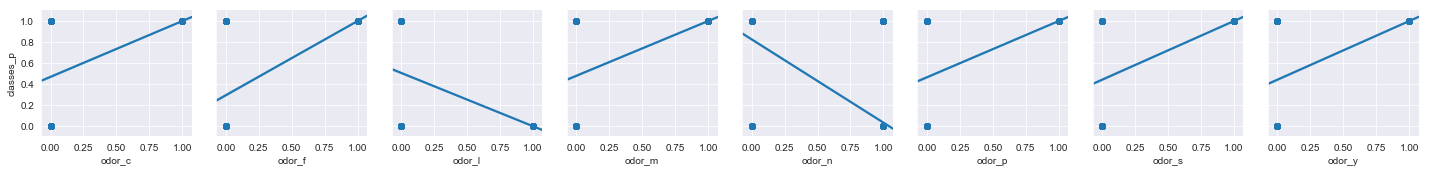

In [17]:
plt1 = sns.pairplot(df2d, y_vars='classes_p',
                   x_vars=['odor_c', 'odor_f',	'odor_l',	'odor_m', 'odor_n',	'odor_p',	'odor_s',	'odor_y'], 
                   kind='reg')

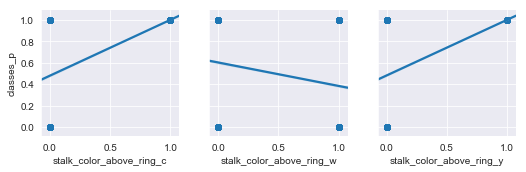

In [19]:
plt2 = sns.pairplot(df2d, y_vars='classes_p',
                   x_vars=['stalk_color_above_ring_c', 'stalk_color_above_ring_w',	
                           'stalk_color_above_ring_y'], 
                   kind='reg')

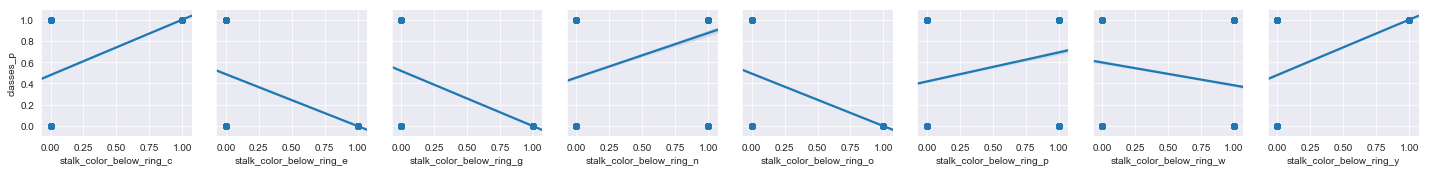

In [21]:
plt2 = sns.pairplot(df2d, y_vars='classes_p',
                   x_vars=['stalk_color_below_ring_c',	'stalk_color_below_ring_e',
                           'stalk_color_below_ring_g',	'stalk_color_below_ring_n',	
                           'stalk_color_below_ring_o',	'stalk_color_below_ring_p',
                           'stalk_color_below_ring_w',	'stalk_color_below_ring_y'], 
                   kind='reg')

In [22]:
feat_col = df2d.iloc[:, 1:]
X= feat_col
X.head()

,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk_color_above_ring_c,stalk_color_above_ring_e,...,stalk_color_above_ring_w,stalk_color_above_ring_y,stalk_color_below_ring_c,stalk_color_below_ring_e,stalk_color_below_ring_g,stalk_color_below_ring_n,stalk_color_below_ring_o,stalk_color_below_ring_p,stalk_color_below_ring_w,stalk_color_below_ring_y
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [23]:
y = df2d['classes_p']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: classes_p, dtype: uint8

In [24]:
y.shape

(8124L,)

In [25]:
X.shape

(8124, 24)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [34]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
knn.predict([[1, 1 ,0,0,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1]])

array([1], dtype=uint8)

In [39]:
X_new = [[1, 1 ,0,0,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1],
        [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]]

In [40]:
knn.predict(X_new)

array([1, 1], dtype=uint8)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg =  LogisticRegression()

In [43]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
logreg.predict(X_new)

array([1, 1], dtype=uint8)

In [125]:
logreg.predict(X)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [45]:
y_pred = logreg.predict(X)

In [47]:
len(y_pred)

8124

In [48]:
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.9881831610044313


In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.9881831610044313


In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.9881831610044313


In [51]:
print X.shape
print y.shape

(8124, 24)
(8124L,)


In [52]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(6093, 24)
(6093L,)
(2031, 24)
(2031L,)


In [53]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = logreg.predict(X_test)

In [55]:
print metrics.accuracy_score(y_test, y_pred)

0.9857213195470211


In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.9857213195470211


In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.9857213195470211


In [58]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

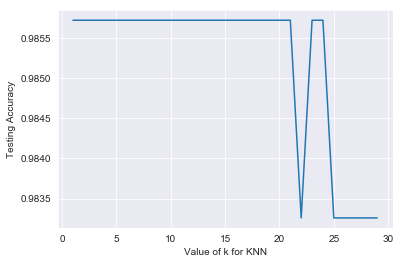

In [59]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [60]:
from sklearn.cross_validation import KFold
kf=KFold(20, n_folds=5, shuffle=False)

In [61]:
print '{} {:^61} {}'.format('Iteration', 'Training Set Observations', 'Testing Set Observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1]) 

Iteration                   Training Set Observations                   Testing Set Observations
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]         [0 1 2 3]        
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]         [4 5 6 7]        
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]       [ 8  9 10 11]      
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]       [12 13 14 15]      
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]       [16 17 18 19]      


In [81]:
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[0.68511685 0.99876999 0.99630996 0.98769988 0.94341943 0.94218942
 1.         1.         0.9432799  0.98397041]


In [82]:
print scores.mean()

0.9480755843316755


In [64]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.9567035670356704, 0.9567035670356704, 0.9564572616169512, 0.9567035670356704, 0.9510315571713054, 0.9510315571713054, 0.9494285978618109, 0.9494285978618109, 0.9494285978618109, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9494285978618109, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9480755843316755, 0.9477056706448691, 0.9477056706448691, 0.9477056706448691, 0.9477056706448691]


Text(0,0.5,'Cross Validation Accuracy')

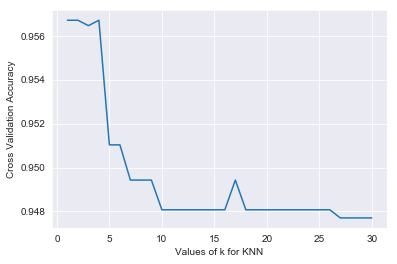

In [65]:
plt.plot(k_range, k_scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Cross Validation Accuracy')

In [66]:
y_test.value_counts()

0    1020
1    1011
Name: classes_p, dtype: int64

In [67]:
y_test.mean()

0.4977843426883309

In [68]:
1 - y_test.mean()

0.5022156573116692

In [69]:
max(y_test.mean(), 1 - y_test.mean())

0.5022156573116692

In [70]:
y_test.value_counts().head(1) / len(y_test)

0    0.502216
Name: classes_p, dtype: float64

In [71]:
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred[0:25]

True: [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0]
Pred: [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0]


In [72]:
logreg.predict(X_test)[0:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=uint8)

In [73]:
logreg.predict_proba(X_test)[0:10]

array([[0.96670857, 0.03329143],
       [0.03816387, 0.96183613],
       [0.03816387, 0.96183613],
       [0.00706147, 0.99293853],
       [0.89962967, 0.10037033],
       [0.03816387, 0.96183613],
       [0.01529223, 0.98470777],
       [0.96670857, 0.03329143],
       [0.0059624 , 0.9940376 ],
       [0.00106336, 0.99893664]])

In [74]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.03329143, 0.96183613, 0.96183613, 0.99293853, 0.10037033,
       0.96183613, 0.98470777, 0.03329143, 0.9940376 , 0.99893664])

In [75]:
y_pred_prob =  logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

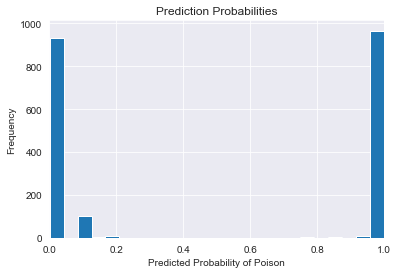

In [80]:
plt.hist(y_pred_prob, bins=24)
plt.xlim(0, 1)
plt.title('Prediction Probabilities')
plt.xlabel('Predicted Probability of Poison')
plt.ylabel('Frequency')